<a href="https://colab.research.google.com/github/valesierrai/Integracion-de-Datos-y-Prospectiva/blob/main/Programaci%C3%B3n_Orientada_por_Objetos_(POO).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Programación Orientada por Objetos - POO**

##0. Cargamos Librerías

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from scipy.stats import skew #Coeficiente de Asimetría
from scipy.stats import kurtosis #Kurtosis

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##1. Cargamos la Base de Datos

In [2]:
nxl="/content/drive/MyDrive/Colab Notebooks/Integración de Datos y Prospectiva/Bases de Datos/3. FallasTecnologicas.xlsx"
XDB=pd.read_excel(nxl, sheet_name=0)
XDB.head(5)

,Fechas,Eventos,Transaccion Promedio,Eventos-Fallo,Pérdida Promedio
0,Semana 1,80,14.8058,1,0.5374
1,Semana 2,105,56.4721,4,1.1978
2,Semana 3,70,9.9760,5,0.4269
3,Semana 4,105,18.2949,6,1.0814
4,Semana 5,130,23.4112,7,1.2105


In [5]:
Xf= XDB.iloc[:,3]
Xs=XDB.iloc[:,4]
LDA=np.multiply(Xf,Xs) #Producto entre las dos variables

#Convertimos la variables LDA en un DataFrame
dfLDA= pd.DataFrame(LDA)

##3. Se crea la función Muestreo y la del Tipo de Distribución

In [41]:
#Función: Muestreo
def muestreo(ND, dfLDA,p):
  #ND: Número de datos del muestreo
  #dfLDA: Datos enviados al método
  #p: Es la confiabilidad del muestreo
  LDAm= dfLDA.sample(n=ND, replace=True)
  media= np.mean(LDAm) #Media
  LI = media+1.96*np.std(LDAm) #Limite Inferior
  LS = media-1.96*np.std(LDAm) #Limite Superior
  cas = skew(LDAm) #Coeficiente de Asimetría
  kur = kurtosis(LDAm) #Kurtosis

  ek2= ((1.96**2)*p*(1-p)/ND) #Error

  plt.figure #Gráfica
  sns.histplot(LDAm, kde=True)
  plt.show()
  return media, LDAm, LI, LS, cas, kur, ek2

In [37]:
#Función: Tipo de Distribución
def tipodist(cas, kur):
  if abs(cas) < 0.5 and abs(kur) < 0.5:
    tpdst= "Posible distribución Normal"
  elif cas > 0 and kur > 3:
    if kur >= 8:
      tpdst= "Posible distribución Exponencial"
    elif kur >= 6:
      tpdst= "Posible distribución Gamma"
    else:
      tpdst= "Posible distribución Weibull"
  elif cas < 0 and kur < 3:
    tpdst= "Posible distribución Beta"
  elif kur < 3:
    tpdst= "Posible distribución Uniforme"
  else:
    tpdst= "No se puede determinar la distribución"
  return tpdst #Nos va a entregar el tipo de distirbución

##4. Procedemos con el Muestreo

###4.1. Muestreo Confiabilidad 99%

/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


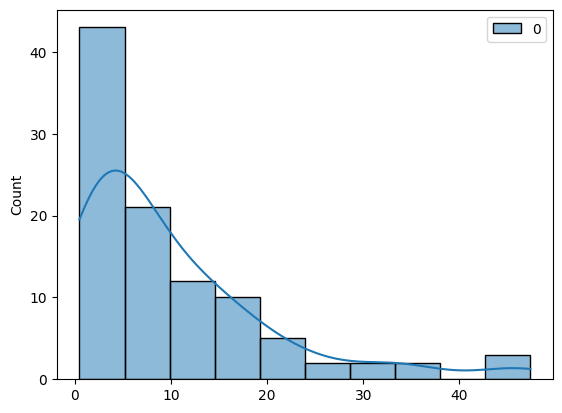

La media de los datos es: 10.06023
El limite inferior es: 0    30.059825
dtype: float64
El limite superior es: 0   -9.939365
dtype: float64
El coeficiente de asimetría es: [1.79422088]
La kurtosis es: [3.13635382]
El tipo de distribución es: Posible distribución Weibull
El error es de: 0.00038031840000000023


In [46]:
#Muestreo a una confiabilidad del 99%
media99, LDAm99, LI99, LS99, cas99, kur99, ek299= muestreo(100, dfLDA, 0.99)
print('La media de los datos es:',media99)
print('El limite inferior es:',LI99)
print('El limite superior es:',LS99)
print('El coeficiente de asimetría es:',cas99)
print('La kurtosis es:',kur99)
print("El tipo de distribución es:",tipodist(cas99, kur99))
print("El error es de:", ek299)

###4.2. Muestreo Confiabilidad 99,9%

/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


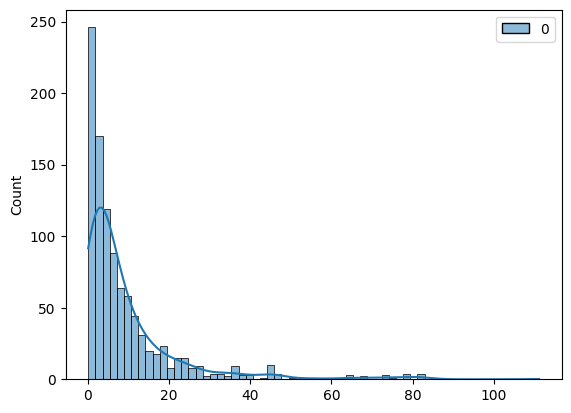

La media de los datos es: 9.3732884
El limite inferior es: 0    35.205518
dtype: float64
El limite superior es: 0   -16.458941
dtype: float64
El coeficiente de asimetría es: [3.26721705]
La kurtosis es: [13.39064704]
El tipo de distribución es: Posible distribución Exponencial
El error es de: 3.837758400000003e-06


In [47]:
#Muestreo a una confiabilidad del 99,9%
media999, LDAm999,LI999, LS999, cas999, kur999, ek2999= muestreo(1000, dfLDA,0.999)
print('La media de los datos es:',media999)
print('El limite inferior es:',LI999)
print('El limite superior es:',LS999)
print('El coeficiente de asimetría es:',cas999)
print('La kurtosis es:',kur999)
print("El tipo de distribución es:",tipodist(cas999, kur999))
print("El error es de:", ek2999)

###4.3. Muestreo Confiabilidad 99,99%

/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


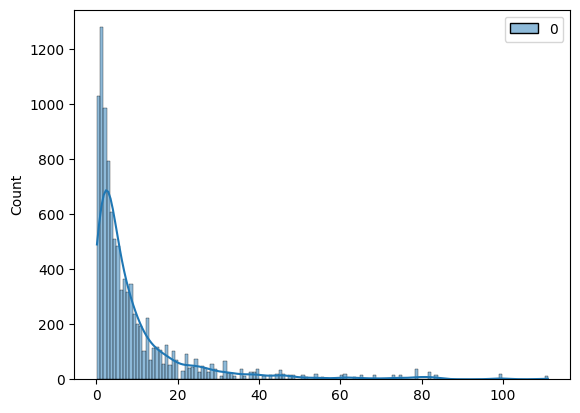

La media de los datos es: 9.55593021
El limite inferior es: 0    37.096601
dtype: float64
El limite superior es: 0   -17.984741
dtype: float64
El coeficiente de asimetría es: [3.3040277]
La kurtosis es: [13.47579505]
El tipo de distribución es: Posible distribución Exponencial
El error es de: 3.841215839999577e-08


In [48]:
#Muestreo a una confiabilidad del 99,99%
media9999, LDAm9999,LI9999, LS9999, cas9999, kur9999, ek29999= muestreo(10000, dfLDA, 0.9999)
print('La media de los datos es:',media9999)
print('El limite inferior es:',LI9999)
print('El limite superior es:',LS9999)
print('El coeficiente de asimetría es:',cas9999)
print('La kurtosis es:',kur9999)
print("El tipo de distribución es:",tipodist(cas9999, kur9999))
print("El error es de:", ek29999)